# Apply grouped operations over multidimensional data

Reference notebook for the fifth task of the Climate Geospatial Analysis with Python and Xarray project on Coursera.

Instructor: Danilo Lessa Bernardineli (https://danlessa.github.io/)

---

- Welcome back! On this task, you are going to learn how to apply operations that involves grouping and resampling. This will greatly increase the scope of what you can do with categorical and temporal datasets, and it is a powerful tool to have.
- In order to start, let's open the task 5 notebook. Run everything as is.

In [1]:
import xarray as xr

In [2]:
ds = xr.open_dataset('data.nc').sel(expver=1)

In [3]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 142, latitude: 89, time: 500)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, latitude, longitude) float32 ...
    skt        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

- As we saw on the end of the last task, it is a bit hard to view the temperature change across years because the vary a lot according to the seasons. What if we instead we took the annual temperature mean? It would have less points and it would filter out the seasonal effect.
- Fortunately, we can do that on Xarray through the groupby method, which works very similiarly to the one from pandas.
- To see how we could get the annual temperature, open a new block and type with me: ds groupby ds time dt year mean dim time latitude longtiude skt plot. Run it.

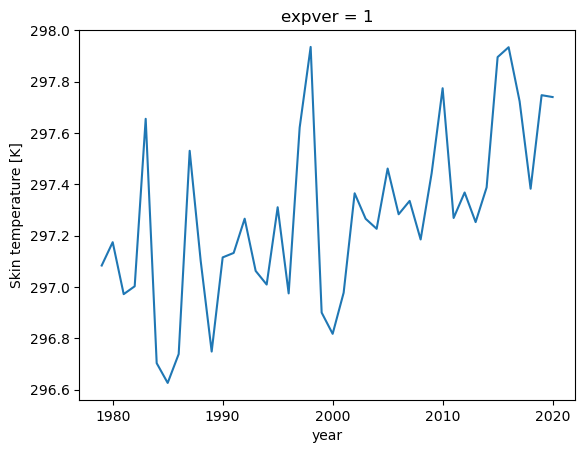

In [4]:
(ds.groupby(ds.time.dt.year)
   .mean(dim=['time', 'latitude', 'longitude'])
   .skt
   .plot())

- Now it is super clear that indeed we have a trend over the temperature! It has increased something between 0.6 and 0.8 degrees Celsius since the data started recording, and most of the trend is carrying since the 2000s.
- What we have just done is to get all the years over the time coordinate through ds time dt year, and used it for having a reference to group. Then, we aggregated over all dimensions so that we are left with the year coordinate. To see what I mean, open a new cell and copy the first three lines on it. Run it.

In [5]:
(ds.groupby(ds.time.dt.year)
   .mean(dim=['time', 'latitude', 'longitude'])
   .skt)

<xarray.DataArray 'skt' (year: 42)>
array([297.08368, 297.17456, 296.9722 , 297.0028 , 297.65518, 296.70334,
       296.6264 , 296.73883, 297.5306 , 297.1022 , 296.74857, 297.11533,
       297.13272, 297.26608, 297.06268, 297.0096 , 297.3107 , 296.9751 ,
       297.6209 , 297.93518, 296.90033, 296.81763, 296.97772, 297.36505,
       297.26578, 297.2267 , 297.46146, 297.2834 , 297.33542, 297.18515,
       297.44296, 297.77426, 297.26892, 297.36813, 297.25284, 297.38797,
       297.89557, 297.93402, 297.72333, 297.3828 , 297.74722, 297.73993],
      dtype=float32)
Coordinates:
    expver   int32 1
  * year     (year) int64 1979 1980 1981 1982 1983 ... 2016 2017 2018 2019 2020
Attributes:
    units:      K
    long_name:  Skin temperature

- This says that our final data is only a temperature for each year. Another example would be to do the same but for months. Copy the previous block, paste it in a new cell, and put month instead of year. Run it.

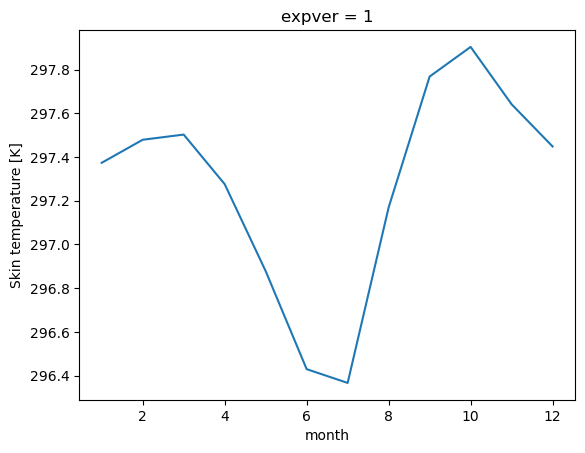

In [6]:
(ds.groupby(ds.time.dt.month)
   .mean(dim=['time', 'latitude', 'longitude'])
   .skt
   .plot())

- Now we have the seasonal mean temperature! You can see that months 6 and 7 are the coldest, and month 10 is the hottested, with a 1.4 degree celsius difference between them.
- Now, let's see the same thing but for the vegetation. Copy the last block into a new one, and put lai hv in place of skt. Run it.

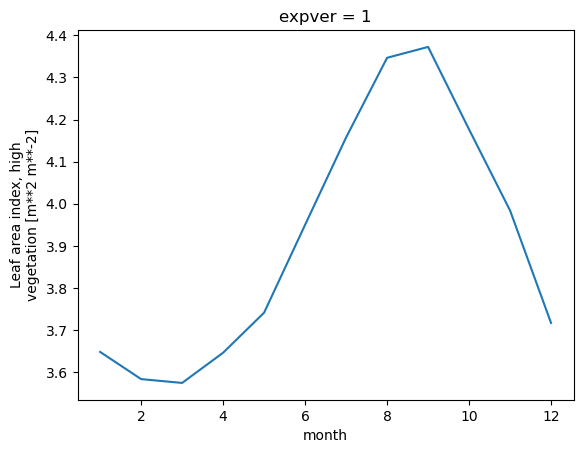

In [7]:
(ds.groupby(ds.time.dt.month)
   .mean(dim=['time', 'latitude', 'longitude'])
   .lai_hv
   .plot())

- Vegetation is at the most dense state on months 8 and 9, and less dense on month 3.
- Now, let's introduce the resampling functionality, which allows you to apply aggregation operations over temporal windows. This is an very powerful time analysis feature, and it is as simple that could get. I'll show how we can get the temperature for 10 years windows.
- Open a new block, and type with me: ds resample time 10y mean dim time latitude longitude skt plot. Run it.

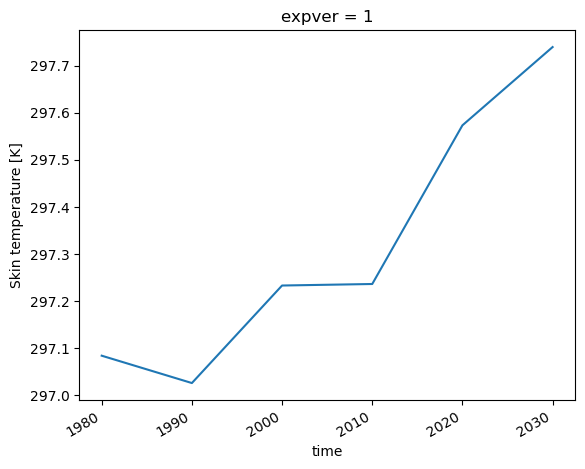

In [8]:
(ds.resample({'time': '10y'})
    .mean(dim=['time', 'latitude', 'longitude'])
    .skt
    .plot()
)

- Now it is super clear that indeed things are getting hot on The Amazon, and that we went up from 297.1K to about 297.7K now. Feel free to pause the video now and to experiment with different resampling intervals.
- So that's it for this task. You now know how to use grouped operations and to resample multidimentional time datasets. On the next task, we are going to learn how to merge and concatenate Xarray datasets and variables so that you can work with several datasets at once. Bye!